In [1]:
# 리스트 7-1-(1)
import numpy as np

# 데이터 생성
np.random.seed(seed = 1) # 난수를 고정
N = 200 # 데이터의 수
K = 3 #  분포의 수, 클래스의 수
T = np.zeros((N, 3), dtype = np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3]
X_range1 = [-3, 3]
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 분포의 분산
Pi = np.array([0.4, 0.8, 1]) # 각 분포에 대한 비율

for n in range(N):
    wk = np.random.rand()
    
    for k in range(K):
        if wk < Pi[k]:
            T[n, k] = 1
            break
    
    for k in range(2):
        X[n, k] = np.random.randn() * Sig[T[n, :] == 1, k] + Mu[T[n, :] == 1, k]

In [2]:
# 리스트 7-1-(2)
# 2분류 데이터를 테스트 훈련 데이터로 분할
TestRatio = 0.5
X_n_training = int(N * TestRatio)
X_train = X[:X_n_training, :]
X_test = X[X_n_training:,:]
T_train = T[:X_n_training, :]
T_test = T[X_n_training:,:]

# 데이터를 'class_data.npz' 에 저장
np.savez('class_data.npz', X_train = X_train, T_train = T_train, X_test = X_test, T_test = T_test, X_range0 = X_range0, X_range1 = X_range1)

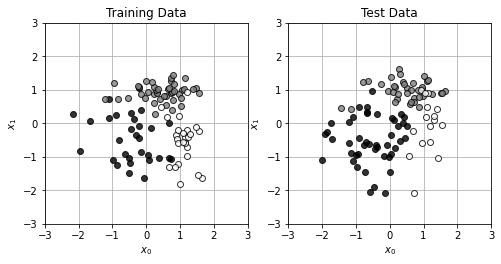

In [3]:
#리스트 7-1-(3)
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터를 그리기
def Show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [0.5, 0.5, 0.5], [1, 1, 1]] # 컬러 값 설정
    #c = [[1, 0, 0], [0, 1, 0], [0, 0, 1]] # 컬러 값 설정 [r, g, b]
    
    for i in range(n):
         plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], linestyle = 'none', markeredgecolor = 'black', marker = 'o', color = c[i], alpha = 0.8)
        # K 값을 0, 1, 2로 바꾸어 주면서 부류벡터 t 에 접근 부류번호가 일치하는 인덱스드을 모두 찾아준다
        # 따라서, 부류가 0번인 샘플들의 (x1, x2) 위치에 포인트를 먼저 다 찍고, 그 다음 부류로 순차적으로 찍게 된다
    plt.grid(True)
    
        
# 메인
plt.figure(1, figsize = (8, 3.7))
plt.subplot(1, 2, 1)
Show_data(X_train, T_train)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Training Data')

plt.subplot(1, 2, 2)
Show_data(X_test, T_test)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Test Data')

plt.show()  

In [4]:
# 리스트 7-1-(4)
# 시그모이드 함수

def Sigmoid(x):
    y = 1 / (1+ np.exp(-x))
    return y

# 네트워크
def FNN(wv, M, K, x): #Feed-forward Neural Network
    #wv : 전체 가중치를 1차원 행벡터로 모아 표현해둔 벡터
    #M : 은닉층 출력의 수
    #K : 출력층 출력의 수
    N, D = x.shape # 입력의 차원 N= 샘플 수, D=특징벡터의 길이(차원 수)
    w = wv[:M * (D+1)] #입력층과 은닉층 사이의 가중치를 가져온다
    w = w.reshape(M, (D+1)) # M * (D+1) 행렬로 변환
    v = wv[M * (D + 1): ] #은닉층과 출력층 사이의 가중치를 가져온다
    v = v.reshape((K, M + 1))
    b = np.zeros((N, M + 1)) # 은닉층 뉴런의 입력 총합
    z = np.zeros((N, M + 1)) # 은닉층 뉴런의 출력
    a = np.zeros((N, K)) #출력층 뉴런의 입력 총합
    y = np.zeros((N, K)) #출력층 뉴런의 출력

    for n in range(N):
        #은닉층의 계산
        for m in range(M):
            b[n, m] = np.dot(w[m, :], np.r_[x[n, :], 1])
            # (a) np.r_[x[n, :], 1]) 더미 입력(바이어스)를
            # 입력 벡터의 3번째 요소로 덧붙이는 부분
            z[n, m] = Sigmoid(b[n, m])

        #출력층의 계산
        z[n, M] = 1 #더미 뉴런(바이어스)
        wkz = 0

        for k in range(K):
            a[n, k] = np.dot(v[k, :], z[n, :])
            wkz = wkz + np.exp(a[n, k])

        for k in range(K):
            y[n, k] = np.exp(a[n, k]) / wkz #최종 출력 값 계산

    return y, a, z, b

WV = np.ones(15) #16개의 매개변수를 모두 1로 초기화
M = 2
K = 3
FNN(WV, M, K, X_train[:2, :])
# 현재 모델에 대한 입력데이터 2개에 대한 출력 y

(array([[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333]]),
 array([[2.6971835 , 2.6971835 , 2.6971835 ],
        [1.49172649, 1.49172649, 1.49172649]]),
 array([[0.84859175, 0.84859175, 1.        ],
        [0.24586324, 0.24586324, 1.        ]]),
 array([[ 1.72359839,  1.72359839,  0.        ],
        [-1.12079826, -1.12079826,  0.        ]]))

In [5]:
# 리스트 7-1-(5)
# 평균 교차 엔트로피 오차
def CE_FNN(wv, M, K, x, t):
    N, D = x.shape
    y,a,z,b=FNN(wv,M,K,x)
    ce = -np.dot(np.log(y.reshape(-1)), t.reshape(-1)) / N
    # N * K 행렬인 y와 t 행렬을 reshape(-1) 을통하여
    # 1차원 행백터로 변환 시킨 후 내적을 구하면
    # 교차엔트로피오차를 쉽게 구할 수 있다.
    return ce

#test
WV = np.ones(15)
M = 2
K = 3
CE_FNN(WV, M, K, X_train[:2, :], T_train[:2, :])

1.0986122886681098

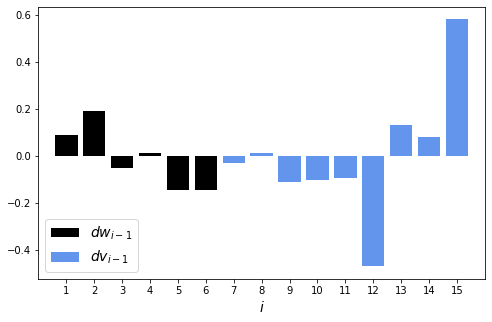

In [6]:
# 리스트 7-1-(6)
# 수치 미분 (근사적인 기울기)

def dCE_FNN_num(wv, M, K, x, t):
    epsilon = 0.001
    dwv = np.zeros_like(wv)

    for iwv in range(len(wv)):
        wv_modified = wv.copy()
        wv_modified[iwv] = wv[iwv] - epsilon
        mse1 = CE_FNN(wv_modified, M, K, x, t)
        wv_modified[iwv] = wv[iwv] + epsilon
        mse2 = CE_FNN(wv_modified, M, K, x, t)
        dwv[iwv] = (mse2 - mse1) / (2 * epsilon)
    return dwv

# dVW 의 표시
def Show_WV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M * 3 + 1), wv[ : M * 3], align = "center", color = 'black', label = '$dw_{i-1}$')
    plt.bar(range(M * 3 + 1, N + 1), wv[M * 3 : ], align = "center", color = 'cornflowerblue', label = '$dv_{i-1}$')
    plt.xticks(range(1, N + 1))
    plt.xlim(0, N +1)
    plt.legend(loc = "lower left", fontsize = 14)
    plt.xlabel('$i$', fontsize=14)
    
    
# 메인
K = 3
nWV = M * 3 + K * (M + 1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)
dWV = dCE_FNN_num(WV, M, K, X_train[: 2, :], T_train[:2, :])
plt.figure(1, figsize = (8, 5))
Show_WV(dWV, M)
plt.show()

In [7]:
# 리스트 7-1-(7)
# 수치 미분법에 의한 경사 하강법
import time
def Fit_FNN_num(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wvt = wv_init
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    epsilon = 0.001

    for i in range(n):
        # for 루프 내에서는 wvt 를 dCE_FNN_num으로 갱신하여,
        # 매번 훈련 데이터의 오차와 테스트 데이터의 오차를 계산
        wvt = wvt -alpha * dCE_FNN_num(wvt, M, K, x_train, t_train)
        err_train[i] = CE_FNN(wvt, M, K, x_train, t_train)
        err_test[i] = CE_FNN(wvt, M, K, x_test, t_test)
        wv_hist[i, :] = wvt

    return wvt, wv_hist, err_train, err_test

# 메인
startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * ( M + 1 ))
N_step = 1000 # (B) 학습 단계
alpha = 0.5 # 학습률
WV, WV_hist, Err_train, Err_test = Fit_FNN_num(
    WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time()- startTime
print("Calculation time : {0: .3f} sec" .format(calculation_time))

Calculation time :  225.014 sec


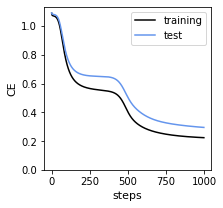

In [8]:
# 리스트 7-1-(8)
# 학습 오차의 표시
plt.figure(1, figsize = (3, 3))
plt.plot(Err_train, 'black', label = 'training')
plt.plot(Err_test, 'cornflowerblue', label = 'test')
plt.xlabel('steps', fontsize = 11)
plt.ylabel('CE', fontsize = 11)
plt.ylim(0, )
plt.legend()
plt.show()

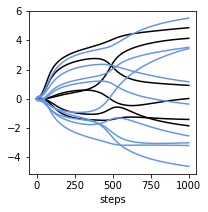

Black: w, Cornflowerblue: v


In [9]:
# 리스트 7-1-(9)
# 가중치의 시간 변화의 표시
plt.figure(1, figsize = (3, 3))
plt.plot(WV_hist[:, : M * 3], 'black')
plt.plot(WV_hist[:, M * 3 :], 'cornflowerblue')
plt.xlabel("steps")
plt.show()
print("Black: w, Cornflowerblue: v")

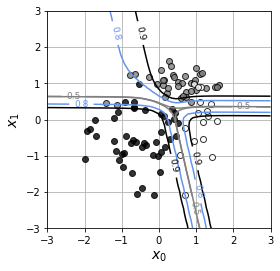

In [10]:
# 리스트 7-1-(10)
# 경계선 표시 함수
# 각각의 카테고리에서 0.5, 0.8, 0.9 이상의 출력을 얻을 수 있는 영역을 등고선으로 표시
def show_FNN(wv, M, K):
    xn = 60 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx1, (xn * xn, 1)), np.reshape(xx0, (xn * xn, 1))] # np.c_ column 추가
    y, a, z, b = FNN(wv, M, K, x)
    plt.figure(1, figsize = (5, 5))
    
    for ic in range(K):
        f = y[: , ic]
        f = f.reshape(xn, xn)
        f = f.T
        cont = plt.contour(xx0, xx1, f, levels = [0.5, 0.8, 0.9], colors = ['gray', 'cornflowerblue', 'black'])
        cont.clabel(fmt = '%1.1f', fontsize = 9)
        
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    
    
# 경계선 표시
plt.figure(1, figsize = (4, 4))
Show_data(X_test,T_test)
show_FNN(WV, M, K)
plt.xlabel('$x_0$', fontsize = 14)
plt.ylabel('$x_1$', fontsize = 14)
plt.show()

In [11]:
# 리스트 7-1-(11)
# 해석적 미분
# 오차 역전파법의 구현
def dCE_FNN(wv, M, K, x, t):
    N, D = x.shape

    # wv를 w와 v로 되돌림
    w = wv[ : M * (D + 1)]
    w = w.reshape(M, (D + 1))
    v = wv[ M * (D + 1) :]
    v = v.reshape((K, M+1))

    # (1) x 를 입력하여 y 를 얻음(전방계산)
    y, a, z, b = FNN(wv, M, K, x)

    #출력변수의 준비
    dwv = np.zeros_like(wv)
    dw = np.zeros((M, D+1))
    dv = np.zeros((K, M+1))
    delta1 = np.zeros(M) # 1층 오차
    delta2 = np.zeros(K) # 2층 오차 (k=0 부분은 사용하지 않음)

    for n in range(N):
        # (2) 출력층의 오차 구하기
        for k in range(K):
            delta2[k] = (y[n, k] - t[n, k])

        # (3) 중간층의 오차 구하기
        for j in range(M):
            delta1[j] = z[n, j] * (1- z[n, j])* np.dot(v[:, j], delta2)

        # (4) v의 기울기 dv 구하기
        for k in range(K):
            dv[k, :] = dv[k, :] + delta2[k] * z[n, :] / N

        # (5) w의 기울기 dw 구하기
        for j in range(M):
            dw[j, :] = dw[j, :] + delta1[j] * np.r_[x[n, :], 1] / N

    # dw와 dv를 합체시킨 dwv로 만들기
    dwv = np.c_[dw.reshape((1, M * (D + 1))), dv.reshape((1, K * (M + 1)))]
    dwv = dwv.reshape(-1)
    return dwv

analytical dWV
[ 0.08848131  0.19158    -0.051398    0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115649 -0.10104422 -0.09427964 -0.46855604
  0.13096434  0.08076649  0.57971253]
numerical dWV
[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


Text(0.5, 0, '$i$')

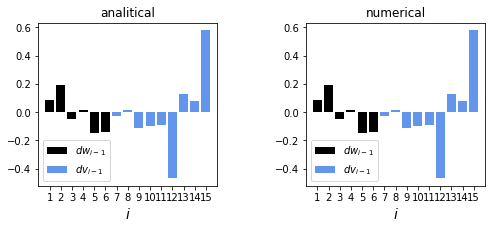

In [13]:


# Show dWV
def Show_dWV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M * 3 + 1), wv[ : M * 3], align = "center", color = 'black', label = '$dw_{i-1}$')
    plt.bar(range(M * 3 + 1, N + 1), wv[M * 3 : ], align = "center", color = 'cornflowerblue', label = '$dv_{i-1}$')
    plt.xticks(range(1, N + 1))
    plt.xlim(0, N +1)
    plt.legend(loc = "lower left", fontsize = 14)
    plt.xlabel('$i$', fontsize=14)

    
# 동작 확인
M = 2
K = 3
N = 2
nWV = M * 3 + K * (M+1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)

dWV_ana = dCE_FNN(WV, M, K, X_train[ : N, : ], T_train[ : N, :])
print("analytical dWV")
print(dWV_ana)

dWV_num = dCE_FNN_num(WV, M, K, X_train[ : N, : ], T_train[ : N, :])
print("numerical dWV")
print(dWV_num)

plt.figure(1, figsize = (8, 3))
plt.subplots_adjust(wspace = 0.5)
plt.subplot(1, 2, 1)
Show_dWV(dWV_ana, M)
plt.title('analitical')
plt.legend(loc = "lower left")
plt.xlabel('$i$', fontsize=14)

plt.subplot(1, 2, 2)
Show_dWV(dWV_num, M)
plt.title('numerical')
plt.legend(loc = "lower left")
plt.xlabel('$i$', fontsize=14)

In [15]:
# 리스트 7-1-(12)
# 해석적 미분법에 의한 경사 하강법 (오류 역전파법)

import time

def Fit_FNN(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wv = wv_init.copy()
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    epsilon = 0.001

    for i in range(n):
        wv = wv - alpha * dCE_FNN(wv, M, K, x_train, t_train)
        err_train[i] = CE_FNN(wv, M, K, x_train, t_train)
        err_test[i] = CE_FNN(wv, M, K, x_test, t_test)
        wv_hist[i, :] = wv

    return wv, wv_hist, err_train, err_test

# 메인
startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M+1))
N_step = 1000 # (B) 학습단계
alpha = 0.5 # 학습률
WV, WV_hist, Err_train, Err_test = Fit_FNN(WV_init, M, K, X_train, T_train,
X_test, T_test, N_step, alpha)

calculation_time = time.time() - startTime
print("Calculation time : {0: .3f} sec" .format(calculation_time))


Calculation time :  28.361 sec


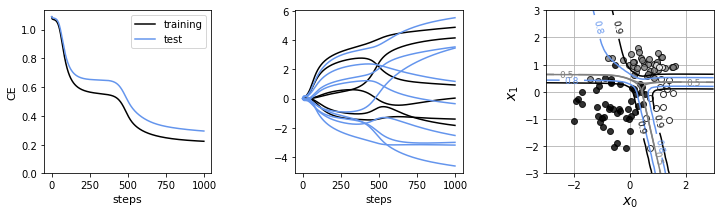

In [16]:
# 리스트 7-1-(13)
plt.figure(1, figsize = (12, 3))
plt.subplots_adjust(wspace = 0.5)

# 학습 오차의 표시
plt.subplot(1, 3, 1)
plt.plot(Err_train, 'black', label = 'training')
plt.plot(Err_test, 'cornflowerblue', label = 'test')
plt.xlabel('steps', fontsize = 11)
plt.ylabel('CE', fontsize = 11)
plt.ylim(0, )
plt.legend()

# 가중치의 시간 변화 표시
plt.subplot(1, 3, 2)
plt.plot(WV_hist[:, : M * 3], 'black')
plt.plot(WV_hist[:, M * 3 :], 'cornflowerblue')
plt.xlabel("steps")

# 경계선 표시
plt.subplot(1, 3, 3)
Show_data(X_test,T_test)
show_FNN(WV, M, K)
plt.xlabel('$x_0$', fontsize = 14)
plt.ylabel('$x_1$', fontsize = 14)
plt.show()




In [50]:
# GPU 버전 사용하는 경우 GPU 메모리를 필요할 때 마다 할당
# 따로 설정이 없으면 할당 가능한 최대 메모리로 할당

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.compat.v1.Session(config=config)

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import time
np.random.seed(1) # random seed

import tensorflow.keras.optimizers #SGD, Adam 같은 최적화기를 포함함
# 모델의 층(layer)을 쌓아가는 방식의 Sequential Class
from tensorflow.keras.models import Sequential
# 네트워크에 사용할 층을 import, Dense=완전연결층, Activation=활성화 함수
from tensorflow.keras.layers import Dense, Activation


In [52]:
# 저장한 데이터 불러오기
outfile = np.load('class_data.npz')
X_train = outfile['X_train']
T_train = outfile['T_train']
X_test = outfile['X_test']
T_test = outfile['T_test']
X_range0 = outfile['X_range0']
X_range1 = outfile['X_range1']

In [53]:
# 리스트 7-2-(3)
# 난수 초기화
np.random.seed(1)

# Sequential 모델 작성
# Sequential 클래스에서 생성된 객체, 케라스는 model에 층을 추가해 네트워크 구조를 정의
model = Sequential()
model.add(Dense(2, input_dim=2, activation='sigmoid',
kernel_initializer = 'uniform'))
# (A) 중간(은닉)층으로 Dense 라는 전결합형의 층을 추가
# 2 = snfustn, input_dim=2 는 입력의 차원
# activation = 'sigmoid' 활성함수 = 시그모이드함수
#kernel_initializer.. 가중치 매개 변수의 초기값을 균일 난수에서 결정

model.add(Dense(3, activation='softmax',
kernel_initializer = 'uniform'))
# (B) 출력층을 Dense 로 추가
# 3 = 출력층 뉴런수

sgd = tensorflow.keras.optimizers.SGD(learning_rate = 1, momentum= 0.0,
decay = 0.0, nesterov = False)

# (C) 경사하강법의 사용
# keras.optimizers.SGD()로 경사하강법 정의
# 1r은 학습률 나머지는 규제

model.compile(optimizer = sgd,
loss = 'categorical_crossentropy', metrics = ['accuracy'])

# (D) model.compile() 을 이용하여 학습 방법 설정
# loss = categorical_crossentropy 는 목적함수를 교차 엔트로피 오차로 지정하고
# metrics = ['acc..' 학습의 평가로 정답률(accurracy) 도 계산하도록 지시

In [54]:
# 학습
startTime = time.time()
history = model.fit(X_train, T_train, epochs= 1000,
batch_size= 100, verbose = 1,
validation_data = (X_test, T_test))

# (E) 실제 학습은 model.fit으로 실행
# 훈련 데이터를 지정하고
# 배치크기(한 번 기울기를 업데이트하는데 사용하는 데이터 수)
# epochs(전체 데이터를 학습에 사용한 횟수)
# verbose = 0 학습 진행 상황을 표시하지 않음
# validation_data 는 평가용 데이터의 지정
# model.fit 의 return은 학습 과정에 대한 정보를 갖고 있으며 history에 저장

calculation_time =time.time()-startTime

Epoch 1/1000
1/1 [==============================] - 0s 451ms/step - loss: 1.0979 - accuracy: 0.4400 - val_loss: 1.0859 - val_accuracy: 0.3800
Epoch 2/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.0778 - accuracy: 0.4400 - val_loss: 1.0837 - val_accuracy: 0.3800
Epoch 3/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.0729 - accuracy: 0.4400 - val_loss: 1.0830 - val_accuracy: 0.3800
Epoch 4/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.0715 - accuracy: 0.4400 - val_loss: 1.0823 - val_accuracy: 0.3800
Epoch 5/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.0708 - accuracy: 0.4400 - val_loss: 1.0816 - val_accuracy: 0.3800
Epoch 6/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.0701 - accuracy: 0.4400 - val_loss: 1.0808 - val_accuracy: 0.3800
Epoch 7/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.0694 - accuracy: 0.4400 - val_loss: 1.0800 - val_accuracy: 0.3800
Epoch 8/1000

In [55]:
history = history.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [56]:
score = model.evaluate(X_test, T_test, verbose=0)

print('cross entropy {0: 3.2f}, accuracy {1: 3.2f}' .format(score[0], score[1]))
print("Calculation time : {0: .3f} sec" .format(calculation_time))

cross entropy  0.27, accuracy  0.90
Calculation time :  49.708 sec


113/113 [==============================] - 0s 3ms/step


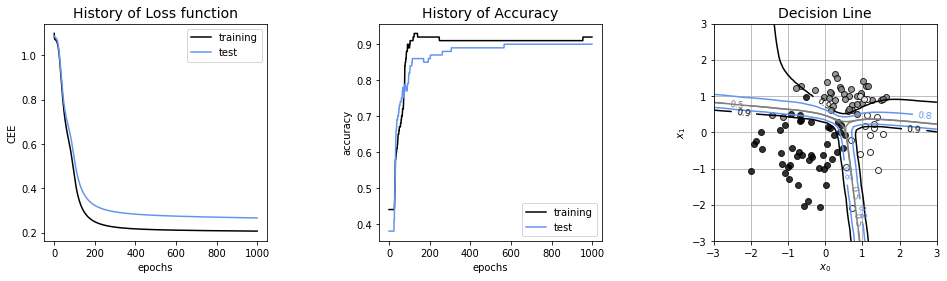

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터를 그리기
def Show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [0.5, 0.5, 0.5], [1, 1, 1]] # 컬러 값 설정
    #c = [[1, 0, 0], [0, 1, 0], [0, 0, 1]] # 컬러 값 설정 [r, g, b]
    
    for i in range(n):
         plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], linestyle = 'none', markeredgecolor = 'black', marker = 'o', color = c[i], alpha = 0.8)
        # K 값을 0, 1, 2로 바꾸어 주면서 부류벡터 t 에 접근 부류번호가 일치하는 인덱스드을 모두 찾아준다
        # 따라서, 부류가 0번인 샘플들의 (x1, x2) 위치에 포인트를 먼저 다 찍고, 그 다음 부류로 순차적으로 찍게 된다
    plt.grid(True)
    
# 리스트 7-2-(4)
plt.figure(1, figsize = (16, 4))
plt.subplots_adjust(wspace = 0.5)

# 학습 곡선 표시
plt.subplot(1, 3, 1)
plt.plot(history['loss'], 'black', label = 'training')
# (A) 학습 과정의 훈련 데이터의 교차 엔트로피 오차의 시계열 정보
plt.plot(history['val_loss'], 'cornflowerblue', label ='test')
# (B) 학습 과정의 평가용 데이터의의 교차 엔트로피 오차
plt.legend()
plt.xlabel('epochs')
plt.ylabel('CEE')
plt.title('History of Loss function', fontsize = 14)


# 정확도 표시
plt.subplot(1, 3, 2)
plt.plot(history['accuracy'], 'black', label = 'training') 
# (C) 훈련 데이터의 정답률 변화
plt.plot(history['val_accuracy'], 'cornflowerblue', label = 'test')
# (D) 평가용 데이터의 정답률 변화
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('History of Accuracy', fontsize = 14)


# 경계선 표시
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
xn = 60 # 등고선 표시 해상도
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')] # np.c_ column 추가
#y, a, z, b = FNN(wv, M, K, x)
y = model.predict(x) # (E) 학습이 완료된 모델에 입력 x에 대한  출력
K = 3

for ic in range(K):
    f = y[: , ic]
    f = f.reshape(xn, xn)
    f = f.T
    cont = plt.contour(xx0, xx1, f, levels = [0.5, 0.8, 0.9], colors = ['gray', 'cornflowerblue', 'black'])
    cont.clabel(fmt = '%1.1f', fontsize = 9)

plt.xlim(X_range0)
plt.ylim(X_range1)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Decision Line', fontsize = 14)

plt.show()

